In [3]:
import mglearn
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

# reshape the images to match the original shape
image_shape = digits.images[0].shape


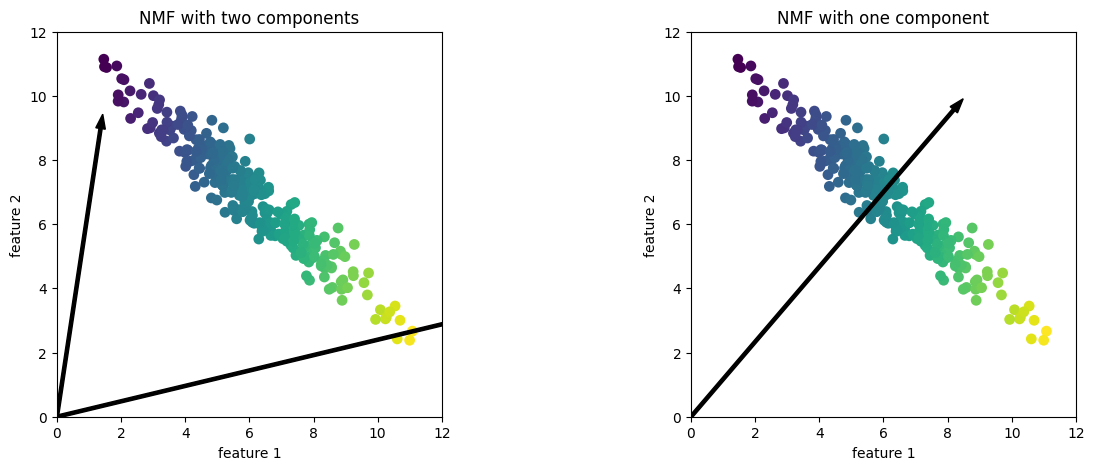

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0., ..., 1.],
       ...,
       [0., ..., 0.]]), array([[0., ..., 8.],
       ...,
       [0., ..., 0.]]))
______________________________________________________nmf_faces - 198.4s, 3.3min


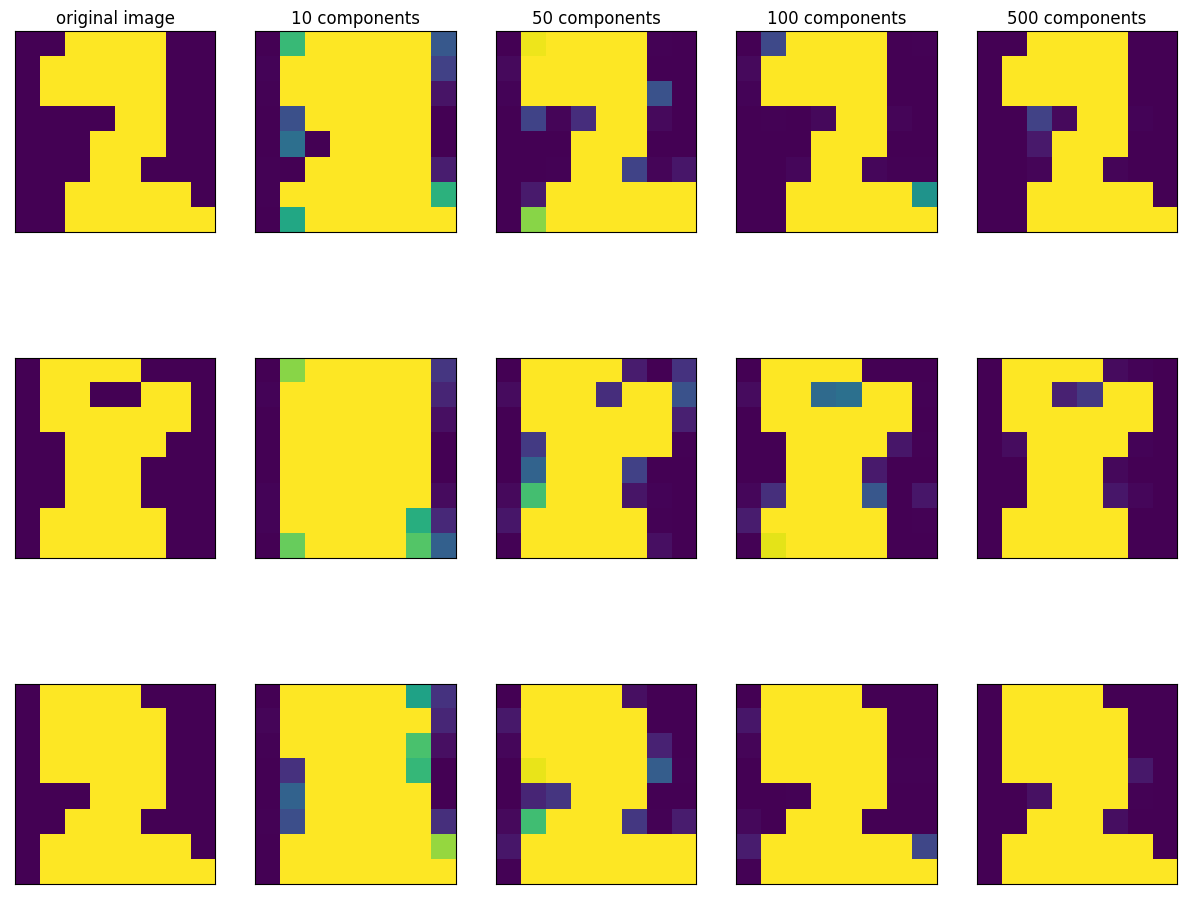

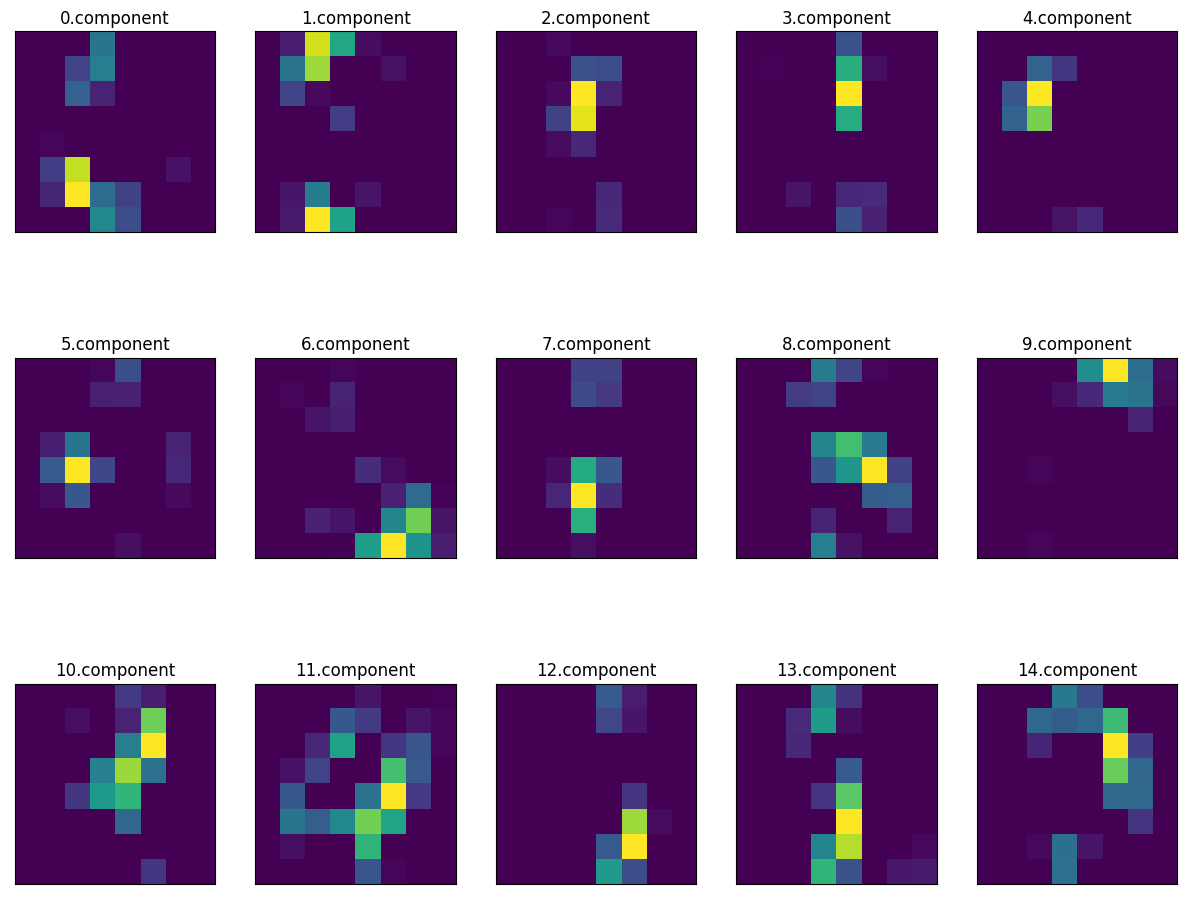

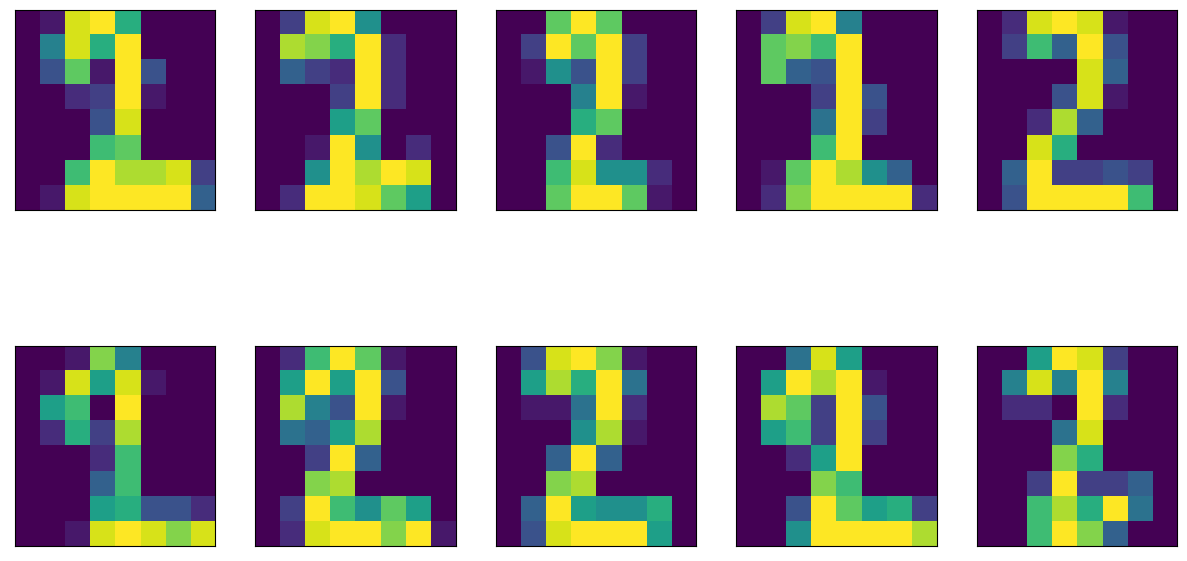

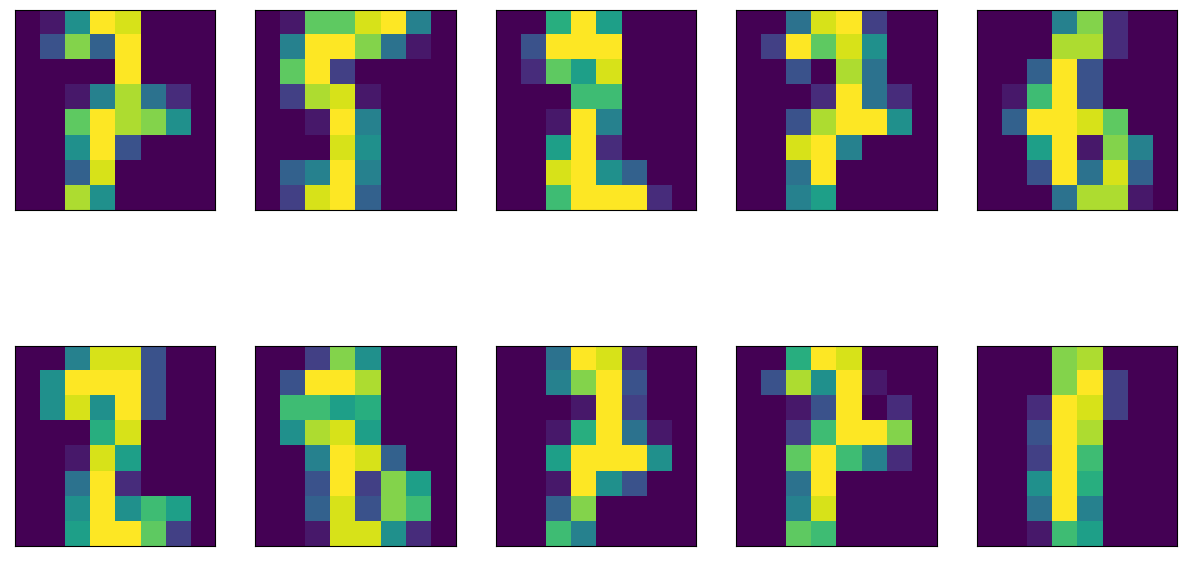

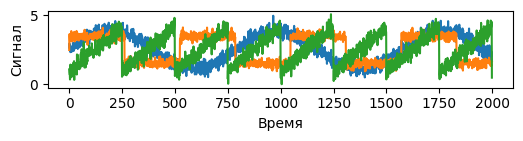

Форма измерений:(2000, 100)
Форма восстановленного сигнала:(2000, 3)


NameError: name 'PCA' is not defined

In [5]:


import warnings
warnings.filterwarnings("ignore")

mglearn.plots.plot_nmf_illustration()
plt.show()

mglearn.plots.plot_nmf_faces(X_train,X_test,image_shape)
plt.show()
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format(i))
plt.show()

compn = 3

#сортируем по 3-й компоненте, выводим первые 10 изображений
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
plt.show()

compn = 7

#сортируем по 7-й компоненте, выводим первые 10 изображений
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
plt.show()

S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S,'-')
plt.xlabel("Время")
plt.ylabel("Сигнал")
plt.show()

A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S,A.T)
print("Форма измерений:{}".format(X.shape))

nmf = NMF(n_components=3,random_state=42)
S_ = nmf.fit_transform(X)
print("Форма восстановленного сигнала:{}".format(S_.shape))

pca = PCA(n_components=3)
H = pca.fit_transform(X)

models = [X,S,S_,H]
names = ['Наблюдения (первые три измерения)','Фактические источники','Сигналы, восстановленные NMF','Сигналы, восстановленные PCA']

fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace':.5}, subplot_kw={'xticks':(),'yticks':()})
for model, name, ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')
plt.show()

from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10,5), subplot_kw={'xticks':(),'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)
plt.show()

#строим модель PCA
pca = PCA(n_components=2)
pca.fit(digits.data)

#преобразуем данные рукописных цифр к первым двум компонентам
digits_pca = pca.transform(digits.data)

colors=["#476A2A","#7851B8","#BD3430","#4A2D4E","#875525","#A83683","#4E655E","#853541","#3A3120","#535D8E"]

plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())

for i in range(len(digits.data)):
# строим график, где цифры представлены символами вместо точек
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),color=colors[digits.target[i]],
             fontdict={'weight':'bold', 'size':9})

plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")

plt.show()

from sklearn.manifold import TSNE
tsne=TSNE(random_state=42)
#используем метод fit_transform вместо fit, т.к. класс TSNE не использует метод transform
digits_tsne=tsne.fit_transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max()+1)



Факторизация  неотрицательных  матриц –еще  один  алгоритм  машинного обучения без учителя, цель которого –выделить полезные характеристики. Он работает так же, как PCA, а также его можно использовать для уменьшения размерности.

в NMFнам нужно получить неотрицательные компоненты и коэффициенты, то есть нам нужны компоненты и коэффициенты, которые больше или равны нулю. 

Процесс разложения данных на неотрицательную взвешенную сумму особенно полезен для данных, созданных в результате объединения (или наложения) нескольких независимых источников,

В таких ситуациях NMFможет найти исходные компоненты, которые лежат в основе объединенных данных. В целом NMFпозволяет получить  более  интерпретабельные  компоненты,  чем PCA, поскольку  отрицательные компоненты и коэффициенты могут привести к получению трудных для интерпретации взаимокомпенсирующих эффекто.
а скорее из-за того, что позволяет находить интересные закономерности в данных

 отличие от PCA, чтобы применить NMFк данным, мы должныубедиться, что они имеют положительные значения. Это означает, чтодля NMFрасположение данных относительно начала координат (0, 0) имеет реальное значение. 

MFиспользует случайную инициализацию,поэтому разные стартовые значения дают различные результат

 Существует класс алгоритмов визуализации, называемых алгоритмами  множественного  обучения(manifold   learning   algorithms),  которые  используют гораздо более сложные графические представления данных и позволяют получить визуализации лучшего качества. Особенно полезным является алгоритм t-SNE.

Некоторые из них, в том числе t-SNE,  создают  новое  представление  обучающих  данных,  но  при  этом  не  осуществляют преобразования новых данных. 

t-SNE,  заключается  в  том,  чтобы  найти  двумерное представление  данных,  сохраняющее  расстояния между  точками  наилучшим  образом. t-SNEначинает свою работу со случайного двумерного представления каждой точки данных, а затем пытается сблизить точки, которые в пространстве исходных признаков находятся близко друг к другу, и отдаляет друг от друга точки, которые находятся далеко друг от друга. При этом t-SNEуделяет большее внимание сохранению расстояний между точкам

лгоритмt-SNEимеет некоторые настраиваемые параметры, хотя, как правило, дает хорошее  качество,  когда  используются  настройки  по  умолчанию.  Вы  можете поэкспериментировать  с  параметрами perplexityи early_exaggeration